In [8]:
import json
import sys
from timeit import default_timer as timer
from datetime import timedelta
import pandas as pd

In [ ]:
# data_file = open("yelp_academic_dataset_business.json", encoding='utf-8')
# data = []
# for line in data_file:
#     data.append(json.loads(line))
# business_df = pd.DataFrame(data)
# data_file.close()

# with open("C:\\Users\\pknb2\\Desktop\\DataSet\\yelp_academic_dataset_business.json", encoding='utf-8') as data:
#     business_df = pd.read_json(data, lines=True)


In [2]:
st = timer()
business_df = pd.read_json("C:\\Users\\pknb2\\Desktop\\DataSet\\yelp_academic_dataset_business.json", lines=True)
print(timedelta(seconds=timer()-st))

0:00:04.093602


In [4]:
print(business_df.head())

              business_id                     name              address  \
0  6iYb2HFDywm3zjuRg0shjw      Oskar Blues Taproom         921 Pearl St   
1  tCbdrRPZA0oiIYSmHG3J0w  Flying Elephants at PDX  7000 NE Airport Way   
2  bvN78flM8NLprQ1a1y5dRg           The Reclaimory   4720 Hawthorne Ave   
3  oaepsyvc0J17qwi8cfrOWg              Great Clips   2566 Enterprise Rd   
4  PE9uqAjdw0E4-8mjGl3wVA        Crossfit Terminus  1046 Memorial Dr SE   

          city state postal_code   latitude   longitude  stars  review_count  \
0      Boulder    CO       80302  40.017544 -105.283348    4.0            86   
1     Portland    OR       97218  45.588906 -122.593331    4.0           126   
2     Portland    OR       97214  45.511907 -122.613693    4.5            13   
3  Orange City    FL       32763  28.914482  -81.295979    3.0             8   
4      Atlanta    GA       30316  33.747027  -84.353424    4.0            14   

   is_open                                         attributes  \
0  

In [33]:
st = timer()
listings_df = pd.read_csv("C:\\Users\\pknb2\\Desktop\\DataSet\\listings.csv")
print(timedelta(seconds=timer()-st))
print(listings_df.head())

0:00:00.388808
        id                           listing_url       scrape_id last_scraped  \
0   197677   https://www.airbnb.com/rooms/197677  20210225053400   2021-02-26   
1   776070   https://www.airbnb.com/rooms/776070  20210225053400   2021-02-26   
2   899003   https://www.airbnb.com/rooms/899003  20210225053400   2021-02-27   
3  1016831  https://www.airbnb.com/rooms/1016831  20210225053400   2021-02-27   
4  1033276  https://www.airbnb.com/rooms/1033276  20210225053400   2021-02-26   

                                             name  \
0                       Oshiage Holiday Apartment   
1                          Kero-kero house room 1   
2               Classy room @Shinjuku, Takadanoba   
3  WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya   
4                        private room @Senju area   

                                         description  \
0  <b>The space</b><br />We are happy to welcome ...   
1  We have been in airbnb since 2011 and it has g...   
2  ..*+;.*:

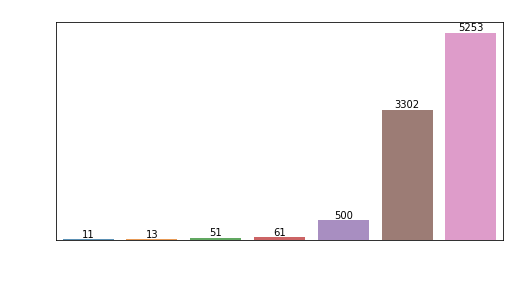

In [26]:
# Ratings Distribution
x = listings_df['review_scores_location'].value_counts()
x = x.sort_index()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Review Scores by Location")
plt.ylabel('# of Listings', fontsize=12)
plt.xlabel("Review Ratings", fontsize=12)
ax.xaxis.label.set_color('White')
ax.yaxis.label.set_color('White')
ax.tick_params(colors='White', which='both')
ax.title.set_color('White')

# Adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [34]:
summary_listings_df = pd.read_csv("C:\\Users\\pknb2\\Desktop\\DataSet\\listings_summary.csv")
print(summary_listings_df.head())

        id                                            name  host_id  \
0   197677                       Oshiage Holiday Apartment   964081   
1   776070                          Kero-kero house room 1   801494   
2   899003               Classy room @Shinjuku, Takadanoba  4799233   
3  1016831  WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya  5596383   
4  1033276                        private room @Senju area  5686404   

         host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0  Yoshimi & Marek                  NaN     Sumida Ku  35.71721  139.82596   
1              Kei                  NaN       Kita Ku  35.73844  139.76917   
2               Yu                  NaN   Shinjuku Ku  35.70865  139.69681   
3           Wakana                  NaN   Setagaya Ku  35.65833  139.67153   
4           Yukiko                  NaN     Adachi Ku  35.74253  139.79730   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  11000   

In [35]:
rating_data = summary_listings_df[['latitude', 'longitude', 'price', 'number_of_reviews']]
print(rating_data)
rating_data['popularity'] = rating_data['price']*rating_data['number_of_reviews']

       latitude  longitude  price  number_of_reviews
0      35.71721  139.82596  11000                165
1      35.73844  139.76917   7428                228
2      35.70865  139.69681   5200                 93
3      35.65833  139.67153  11000                211
4      35.74253  139.79730  30000                 72
...         ...        ...    ...                ...
11303  35.69420  139.69182   5000                  0
11304  35.72089  139.79126  10309                  0
11305  35.70376  139.70007  28000                  0
11306  35.71585  139.79975  20000                  0
11307  35.69769  139.70470   2271                  0

[11308 rows x 4 columns]


c:\users\pknb2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


c:\users\pknb2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


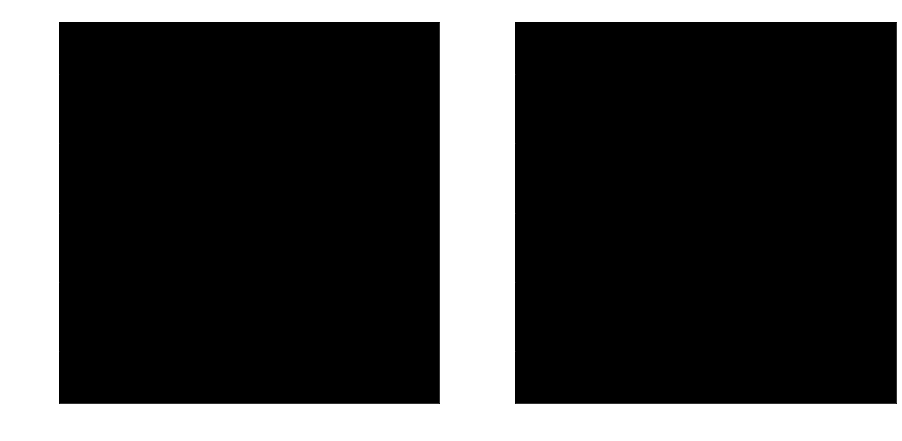

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
lat = 36.207430
lon = -115.268460
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_vegas=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow',
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")
ax1.set_facecolor('black')
ax1.xaxis.label.set_color('White')
ax1.yaxis.label.set_color('White')
ax1.tick_params(colors='White', which='both')
ax1.title.set_color('White')

#a random point inside pheonix
lat = 33.435463
lon = -112.006989
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_pheonix=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow',
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Pheonix")
ax2.set_facecolor('black')
ax2.xaxis.label.set_color('White')
ax2.yaxis.label.set_color('White')
ax2.tick_params(colors='White', which='both')
ax2.title.set_color('White')
f.show()